In [184]:
%matplotlib inline

import numpy as np
from scipy import signal
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


ds=pd.read_pickle('/Users/demi/Desktop/pollen data/weather_v2.pkl')
df=ds[1]
df1=df.loc['2000-01-01':'2021-01-31']
# df1=df.loc[df.index<='2021-1-31']


df1['Count Date']=df1.index
df1['Count Date']=df1['Count Date'].astype('datetime64[ns]')
df1

/var/folders/q1/7fhq9ggs78g6wf7c38dhzh9h0000gn/T/ipykernel_78036/3767438390.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Count Date']=df1.index
/var/folders/q1/7fhq9ggs78g6wf7c38dhzh9h0000gn/T/ipykernel_78036/3767438390.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Count Date']=df1['Count Date'].astype('datetime64[ns]')


,av_abl_ht,accum_prcp,av_lwsfcdown,av_mslp,av_qsair_scrn,av_swsfcdown,av_temp_scrn,av_uwnd10m,av_vwnd10m,av_wndgust10m,...,thermal_time_10D,thermal_time_30D,thermal_time_90D,thermal_time_180D,soil_mois_1D,soil_mois_10D,soil_mois_30D,soil_mois_90D,soil_mois_180D,Count Date
2000-01-02,753.565000,0.000156,293.490000,101769.360000,0.006113,411.645000,289.752500,-0.855000,4.340000,8.495000,...,6.375000,6.375000,6.375000,6.375000,2343.648438,2721.484375,2721.484375,2721.484375,2721.484375,2000-01-02
2000-01-03,882.295000,0.011341,340.160000,101239.120000,0.007275,333.087500,294.993125,0.780000,-1.270000,8.580000,...,13.000000,13.000000,13.000000,13.000000,2341.230469,4969.046875,4969.046875,4969.046875,4969.046875,2000-01-03
2000-01-04,642.775000,0.241001,354.760625,101026.800000,0.008047,274.170000,289.227500,3.050000,4.835000,12.920000,...,17.375000,17.375000,17.375000,17.375000,2340.359375,7215.773438,7215.773438,7215.773438,7215.773438,2000-01-04
2000-01-05,850.585000,0.021159,332.816250,101789.000000,0.006387,309.916250,287.412500,3.655000,7.555000,16.020000,...,20.250000,20.250000,20.250000,20.250000,2339.445312,9461.621094,9461.621094,9461.621094,9461.621094,2000-01-05
2000-01-06,772.685000,0.006436,339.945000,101948.000000,0.007227,344.033125,289.284375,0.785000,5.965000,10.745000,...,23.000000,23.000000,23.000000,23.000000,2338.539062,11706.601562,11706.601562,11706.601562,11706.601562,2000-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,834.791667,0.075095,352.086666,100960.166667,0.007849,130.549167,289.445415,-0.145833,4.887499,10.920833,...,75.999756,184.374908,184.374908,787.493103,7547.602417,76221.471649,229415.330170,692386.868195,961095.985832,2021-01-27
2021-01-28,963.125000,0.000219,335.512920,101483.541667,0.007803,334.555417,293.186250,-2.487500,2.991666,9.762500,...,76.049896,186.924896,186.924896,789.674408,7535.679962,76149.324097,229251.895264,692180.215698,967718.756729,2021-01-28
2021-01-29,896.600000,0.484703,395.593999,101408.280000,0.009936,132.476798,295.356401,-2.292000,-0.148000,5.888000,...,74.274933,185.274902,185.274902,790.161865,7836.774933,76074.451599,229086.352783,691967.418121,974334.436188,2021-01-29
2021-01-30,632.791667,0.407535,395.608746,100911.333333,0.011993,86.142084,292.612085,0.550000,-1.445833,7.416667,...,71.924927,182.549927,182.549927,789.127441,7542.737488,76027.771698,228949.192780,691782.330627,980975.300159,2021-01-30


In [185]:
d2=pd.read_csv('/Users/demi/Desktop/pollen data/melbourne_grass_preprocessed.csv')
# df2=d1.loc[d1['Location']==1]
d2['Count Date']=d2['Count Date'].astype('datetime64[ns]')
df=pd.merge(df1,d2,on='Count Date')

# df=df.drop(['Location','QCL','Latitude','Longitude','Elevation','Continuation Location','Sample Time','SchColTime','Name','State','NameMLFile'],axis=1)
# df['Count']=df['Count'].fillna(method='bfill').astype(int)
# print(df['Count'].isnull().values==True)
df

,av_abl_ht,accum_prcp,av_lwsfcdown,av_mslp,av_qsair_scrn,av_swsfcdown,av_temp_scrn,av_uwnd10m,av_vwnd10m,av_wndgust10m,...,thermal_time_30D,thermal_time_90D,thermal_time_180D,soil_mois_1D,soil_mois_10D,soil_mois_30D,soil_mois_90D,soil_mois_180D,Count Date,grass_count
0,753.565000,0.000156,293.490000,101769.360000,0.006113,411.645000,289.752500,-0.855000,4.340000,8.495000,...,6.375000,6.375000,6.375000,2343.648438,2721.484375,2721.484375,2721.484375,2721.484375,2000-01-02,0.0
1,882.295000,0.011341,340.160000,101239.120000,0.007275,333.087500,294.993125,0.780000,-1.270000,8.580000,...,13.000000,13.000000,13.000000,2341.230469,4969.046875,4969.046875,4969.046875,4969.046875,2000-01-03,0.0
2,642.775000,0.241001,354.760625,101026.800000,0.008047,274.170000,289.227500,3.050000,4.835000,12.920000,...,17.375000,17.375000,17.375000,2340.359375,7215.773438,7215.773438,7215.773438,7215.773438,2000-01-04,0.0
3,850.585000,0.021159,332.816250,101789.000000,0.006387,309.916250,287.412500,3.655000,7.555000,16.020000,...,20.250000,20.250000,20.250000,2339.445312,9461.621094,9461.621094,9461.621094,9461.621094,2000-01-05,0.0
4,772.685000,0.006436,339.945000,101948.000000,0.007227,344.033125,289.284375,0.785000,5.965000,10.745000,...,23.000000,23.000000,23.000000,2338.539062,11706.601562,11706.601562,11706.601562,11706.601562,2000-01-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,834.791667,0.075095,352.086666,100960.166667,0.007849,130.549167,289.445415,-0.145833,4.887499,10.920833,...,184.374908,184.374908,787.493103,7547.602417,76221.471649,229415.330170,692386.868195,961095.985832,2021-01-27,1.0
7697,963.125000,0.000219,335.512920,101483.541667,0.007803,334.555417,293.186250,-2.487500,2.991666,9.762500,...,186.924896,186.924896,789.674408,7535.679962,76149.324097,229251.895264,692180.215698,967718.756729,2021-01-28,7.0
7698,896.600000,0.484703,395.593999,101408.280000,0.009936,132.476798,295.356401,-2.292000,-0.148000,5.888000,...,185.274902,185.274902,790.161865,7836.774933,76074.451599,229086.352783,691967.418121,974334.436188,2021-01-29,2.0
7699,632.791667,0.407535,395.608746,100911.333333,0.011993,86.142084,292.612085,0.550000,-1.445833,7.416667,...,182.549927,182.549927,789.127441,7542.737488,76027.771698,228949.192780,691782.330627,980975.300159,2021-01-30,0.0


In [148]:
print(df['Count Date'])
df['Count Date'] = pd.to_datetime(df['Count Date'])
df = df.set_index('Count Date')
df

0      2000-01-02
1      2000-01-03
2      2000-01-04
3      2000-01-05
4      2000-01-06
          ...    
7696   2021-01-27
7697   2021-01-28
7698   2021-01-29
7699   2021-01-30
7700   2021-01-31
Name: Count Date, Length: 7701, dtype: datetime64[ns]


,av_abl_ht,accum_prcp,av_lwsfcdown,av_mslp,av_qsair_scrn,av_swsfcdown,av_temp_scrn,av_uwnd10m,av_vwnd10m,av_wndgust10m,...,thermal_time_10D,thermal_time_30D,thermal_time_90D,thermal_time_180D,soil_mois_1D,soil_mois_10D,soil_mois_30D,soil_mois_90D,soil_mois_180D,grass_count
Count Date,,,,,,,,,,,,,,,,,,,,,
2000-01-02,753.565000,0.000156,293.490000,101769.360000,0.006113,411.645000,289.752500,-0.855000,4.340000,8.495000,...,6.375000,6.375000,6.375000,6.375000,2343.648438,2721.484375,2721.484375,2721.484375,2721.484375,0.0
2000-01-03,882.295000,0.011341,340.160000,101239.120000,0.007275,333.087500,294.993125,0.780000,-1.270000,8.580000,...,13.000000,13.000000,13.000000,13.000000,2341.230469,4969.046875,4969.046875,4969.046875,4969.046875,0.0
2000-01-04,642.775000,0.241001,354.760625,101026.800000,0.008047,274.170000,289.227500,3.050000,4.835000,12.920000,...,17.375000,17.375000,17.375000,17.375000,2340.359375,7215.773438,7215.773438,7215.773438,7215.773438,0.0
2000-01-05,850.585000,0.021159,332.816250,101789.000000,0.006387,309.916250,287.412500,3.655000,7.555000,16.020000,...,20.250000,20.250000,20.250000,20.250000,2339.445312,9461.621094,9461.621094,9461.621094,9461.621094,0.0
2000-01-06,772.685000,0.006436,339.945000,101948.000000,0.007227,344.033125,289.284375,0.785000,5.965000,10.745000,...,23.000000,23.000000,23.000000,23.000000,2338.539062,11706.601562,11706.601562,11706.601562,11706.601562,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,834.791667,0.075095,352.086666,100960.166667,0.007849,130.549167,289.445415,-0.145833,4.887499,10.920833,...,75.999756,184.374908,184.374908,787.493103,7547.602417,76221.471649,229415.330170,692386.868195,961095.985832,1.0
2021-01-28,963.125000,0.000219,335.512920,101483.541667,0.007803,334.555417,293.186250,-2.487500,2.991666,9.762500,...,76.049896,186.924896,186.924896,789.674408,7535.679962,76149.324097,229251.895264,692180.215698,967718.756729,7.0
2021-01-29,896.600000,0.484703,395.593999,101408.280000,0.009936,132.476798,295.356401,-2.292000,-0.148000,5.888000,...,74.274933,185.274902,185.274902,790.161865,7836.774933,76074.451599,229086.352783,691967.418121,974334.436188,2.0


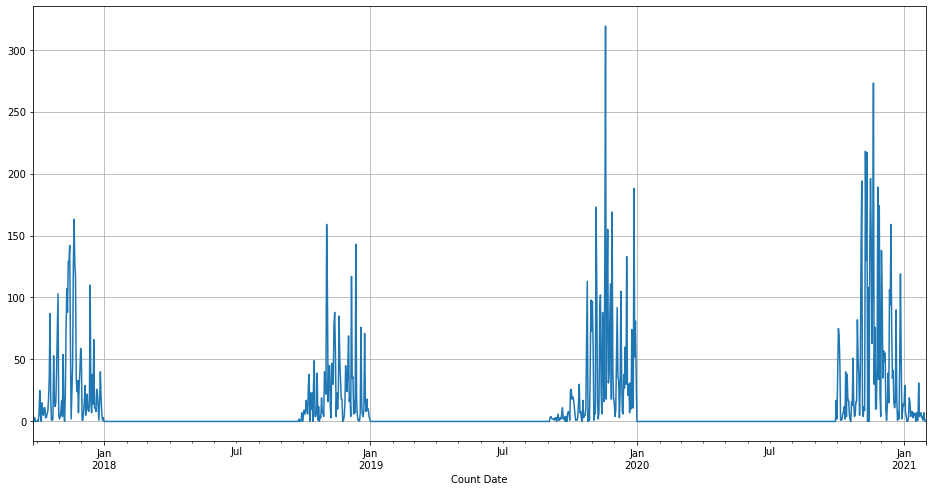

In [38]:
# df=pd.read_csv('/Users/demi/Desktop/pollen data/Grass.csv')
df['grass_count'].plot(figsize=(16,8))
# size of script
plt.tick_params(labelsize=10)
# generate grids
plt.grid()

<AxesSubplot:ylabel='Frequency'>

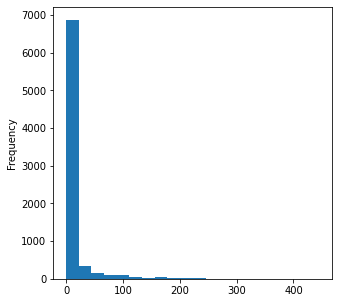

In [14]:
plt.style.use({'figure.figsize':(5,5)})
df['grass_count'].plot(kind='hist',bins=20)

In [16]:
# mean of the year 2018
df_M=pd.DataFrame(df['grass_count']['2018'])
df_M.resample('M').mean().T

Count Date,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31
grass_count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,14.451613,37.7,25.709677


<AxesSubplot:xlabel='Count Date'>

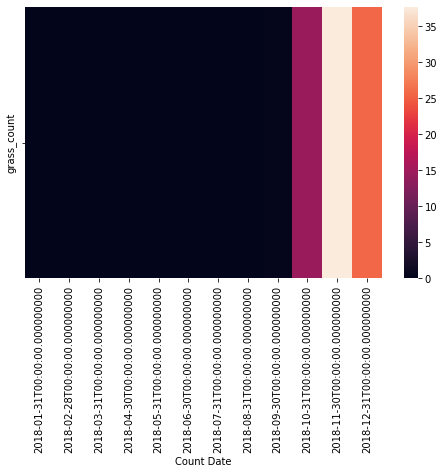

In [17]:
plt.style.use({'figure.figsize':(8,5)})

sns.heatmap(df_M.resample('M').mean().T)

<AxesSubplot:xlabel='Count Date'>

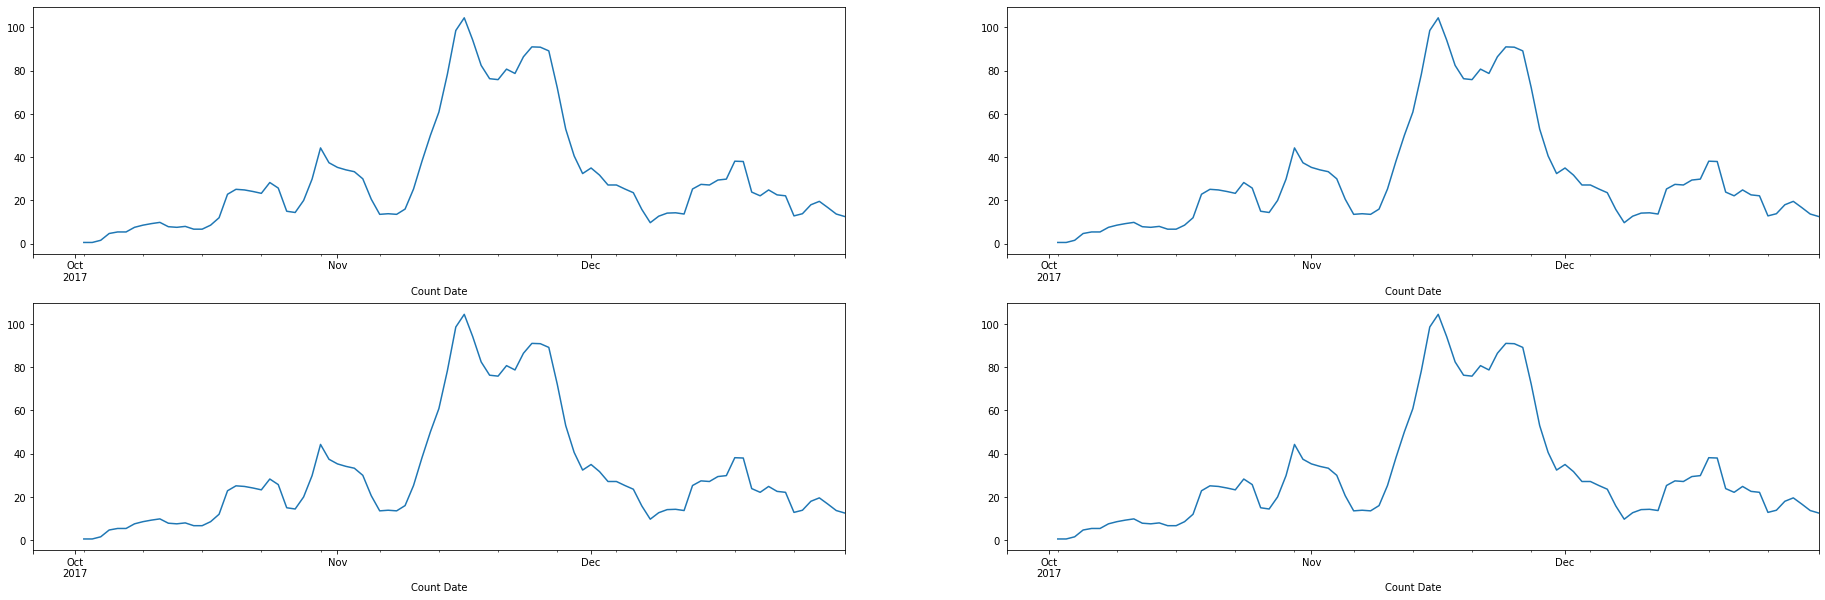

In [9]:
# Apply the Moving Average function by a subset of size 7 days.

fig,axes=plt.subplots(2,2)
plt.subplot(2,2,1)
# Select the subset data from 2017-9 to 2017-12
df2017=df.loc['2017-9':'2017-12']['Count']      
df2017_mean = df2017.T.rolling(window=7).mean()
df2017_mean.plot(figsize=(32,10))
plt.subplot(2,2,2)
# Select the subset data from 2018-9 to 2018-12
df2018=df.loc['2018-10':'2018-12']['Count']      
df2018_mean = df2017.T.rolling(window=7).mean()
df2018_mean.plot(figsize=(32,10))
plt.subplot(2,2,3)
# Select the subset data from 2019-9 to 2019-12
df2019=df.loc['2019-10':'2019-12']['Count']      
df2019_mean = df2017.T.rolling(window=7).mean()
df2019_mean.plot(figsize=(32,10))
plt.subplot(2,2,4)
# Select the subset data from 2020-9 to 2020-12
df2020=df.loc['2020-10':'2020-12']['Count']      
df2020_mean = df2017.T.rolling(window=7).mean()
df2020_mean.plot(figsize=(32,10))

<AxesSubplot:xlabel='Count Date'>

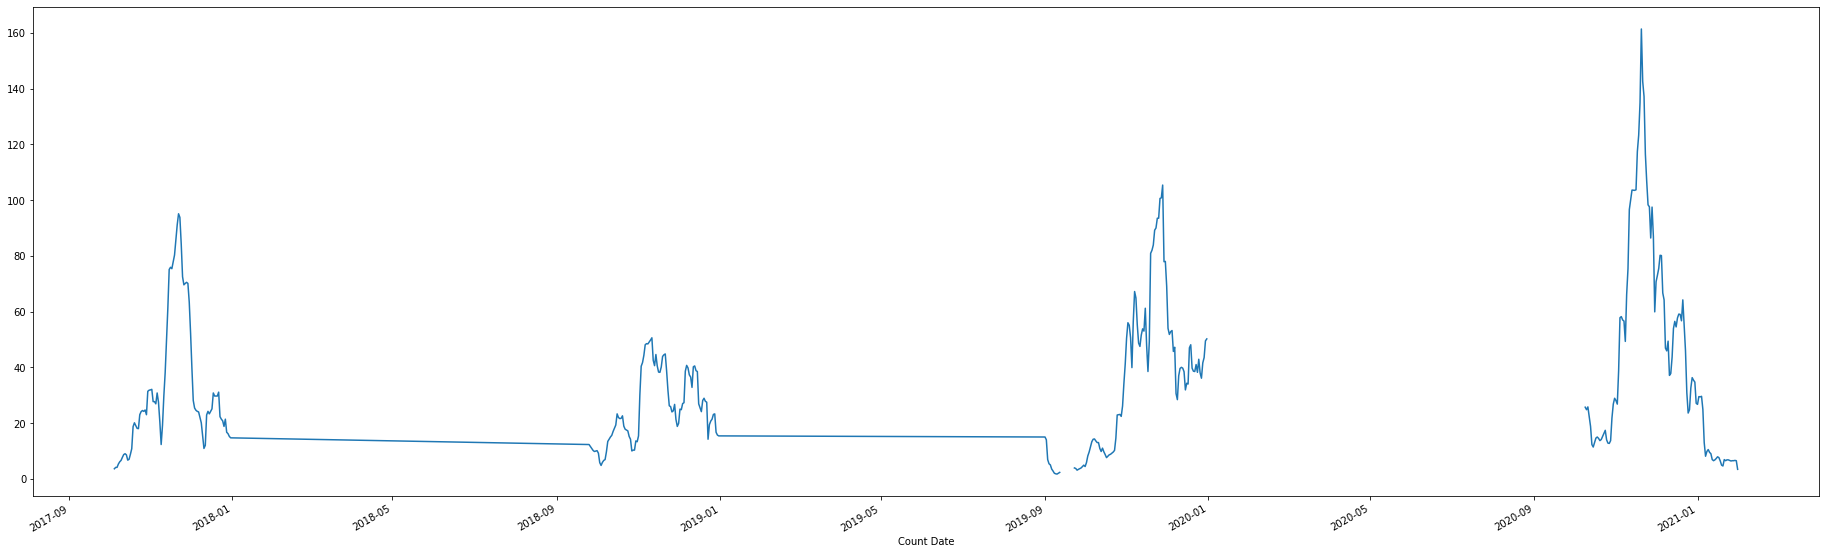

In [10]:
df_mean = df['Count'].T.rolling(window=10).mean()
df_mean.plot(figsize=(32,10))

<AxesSubplot:xlabel='Count Date'>

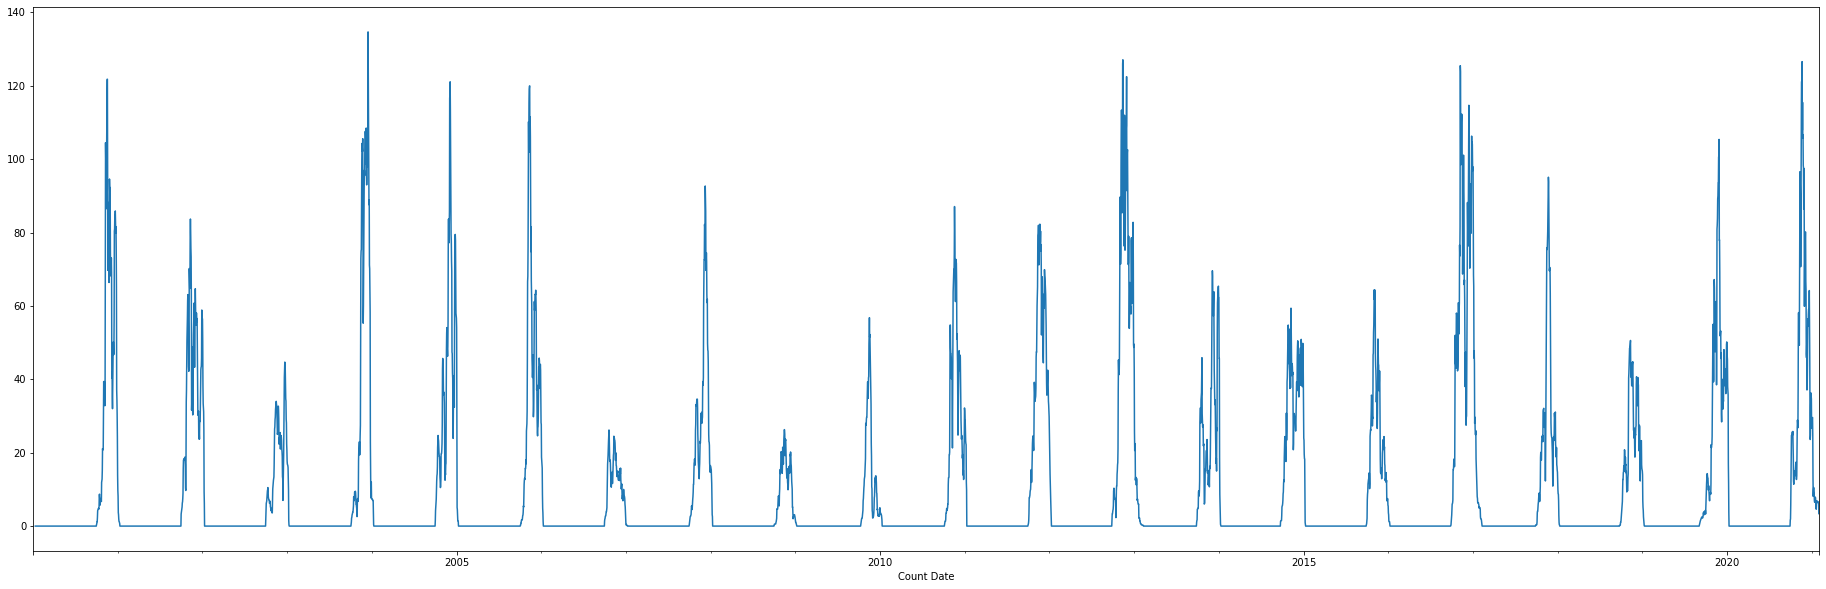

In [23]:
df_mean = df['grass_count'].T.rolling(window=10).mean()
df_mean.plot(figsize=(32,10))

### Time-series decomposition

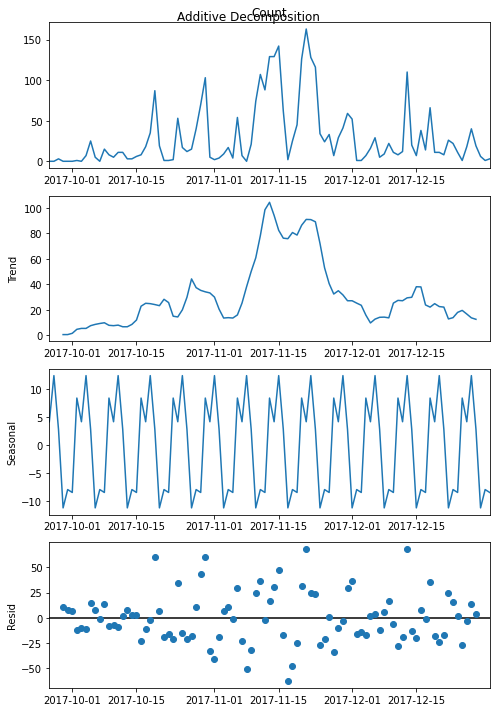

In [147]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(df2017, model='additive')

# Plot
plt.rcParams.update({'figure.figsize': (7,10)})
result_add.plot().suptitle('Additive Decomposition', fontsize=12)
plt.show()

unstable with seasonality

### Autocorrelation

In [236]:
from scipy.stats import pearsonr

a = df['grass_count']
a = a.fillna(method='bfill')
b = a.shift(1)

print(pearsonr(a[1:], b[1:]))

PearsonRResult(statistic=0.5552438295581152, pvalue=0.0)


/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


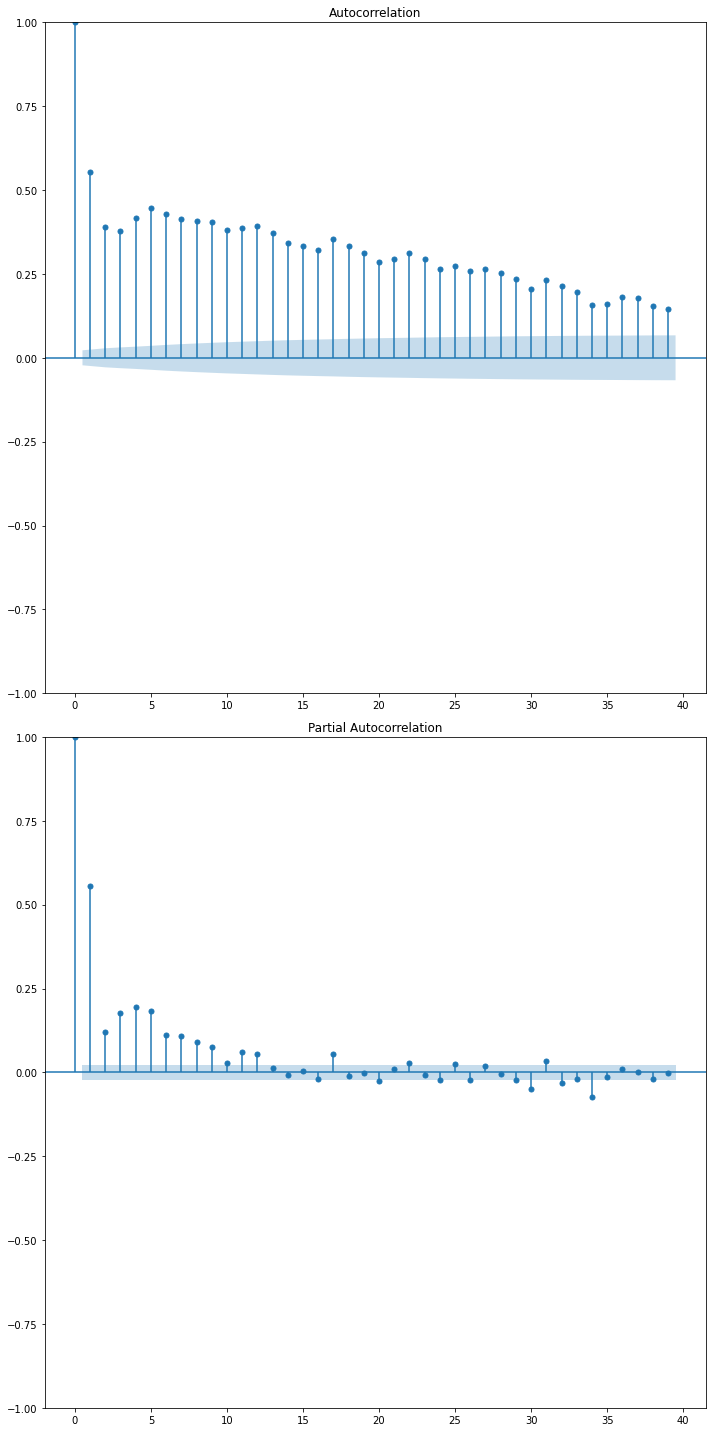

In [237]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(2,1)
plot_acf(a, ax=axes[0])
plot_pacf(a, ax=axes[1])

plt.tight_layout()
plt.show()

## lags are on the horizontal

You can observe that the PACF lag 1 is quite significant since is well above the significance line. Lag 2 turns out to be significant as well, managing to cross the significance limit (blue region). So take p as 2.

Couple of lags are well above the significance line. So, let’s tentatively fix q as 2.

([<matplotlib.axis.YTick at 0x286290220>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

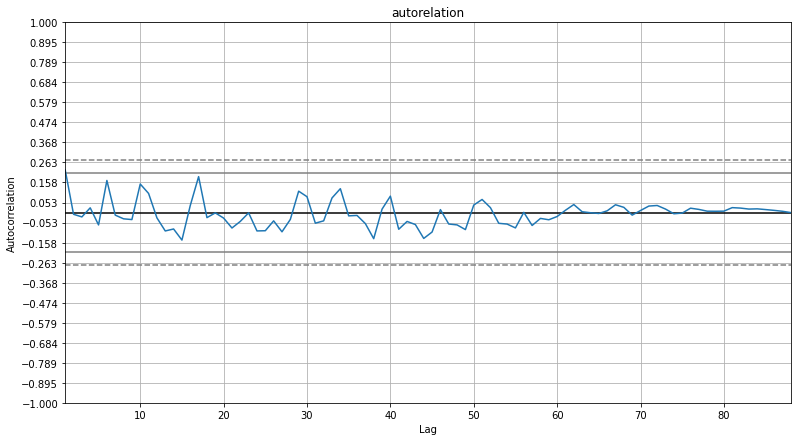

In [ ]:

plt.style.use({'figure.figsize':(13,7)})

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2018)
plt.title('autorelation')
# 设置坐标文字大小
plt.tick_params(labelsize=10)

# plt.xticks(np.linspace(0, 3650, 7))
plt.yticks(np.linspace(-1, 1, 20))

### Stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
a = df['Count']
a = a.fillna(method='bfill')
print(adfuller(a,   
				maxlag=None, 
				regression='c', 
				autolag='AIC',   # automatically choose best lag in [0, 1,...,maxlag] method；
				store=False, 
				regresults=False)
				)



(-4.03425679820627, 0.0012413820990973753, 6, 423, {'1%': -3.4459042013025836, '5%': -2.8683970525583358, '10%': -2.5704225783970176}, 4229.037182676861)


p-value is 0.0012413820990973753, so it is stationary

## simple exponential smoothing

In [186]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

df1=pd.DataFrame()
df1['ds']=df['Count Date']
df1['y']=df['grass_count']
df1['ds'] = pd.to_datetime(df1['ds'])
df1 = df1.set_index('ds')
# split data
train_data=df1[0:310]
test_data=df1[304:]
test_data.head()


,y
ds,
2000-11-01,90.0
2000-11-02,68.0
2000-11-03,27.0
2000-11-04,6.0
2000-11-05,5.0


/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


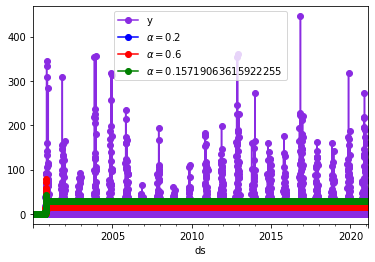

In [187]:
df1.plot(marker='o', color='blueviolet',legend=True)
fit1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(300).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')



fit2 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(len(test_data)).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red',legend=True)
fit2.fittedvalues.plot(marker='o', color='red')


fit3 = SimpleExpSmoothing(train_data).fit()
fcast3 = fit3.forecast(len(test_data)).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()

## Hold's method

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/var/folders/q1/7fhq9ggs78g6wf7c38dhzh9h0000gn/T/ipykernel_78036/1622727271.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train_data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
/var/folders/q1/7fhq9ggs78g6wf7c38dhzh9h0000gn/T/ipykernel_78036/1622727271.py:7: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit3 = Holt(train_data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/var/folders/q1/7fhq9ggs78g6wf7c38dhzh9h0000gn/T/ipykernel_78036/1622727271.py:7: 

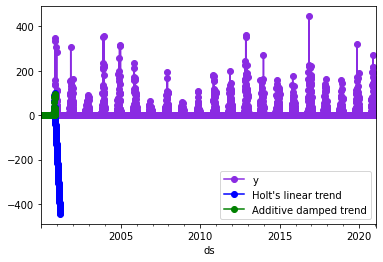

In [188]:
df1.plot(marker='o', color='blueviolet',legend=True)
fit1 = Holt(train_data).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(120).rename("Holt's linear trend")
fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)

fit3 = Holt(train_data, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='green', marker="o", legend=True)

plt.show()

## Holt's winters

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


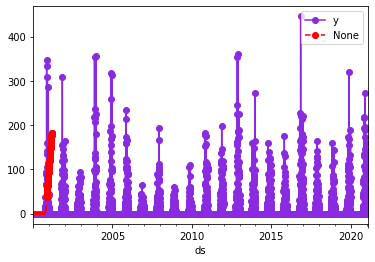

In [189]:
df1.plot(marker='o', color='blueviolet',legend=True)
fit1 = ExponentialSmoothing(train_data, seasonal_periods=4, trend='add', seasonal='add').fit()
# fit3 = ExponentialSmoothing(train_data, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit()
fit1.fittedvalues.plot(style='--', color='red')
fit1.forecast(120).plot(style='--', marker='o', color='red', legend=True)
plt.show()

## ARIMA


In [202]:
from statsmodels.tsa.arima.model import ARIMA

# 2,0,2 ARIMA Model
model = ARIMA(df1, order=(3,0,1))#p,d,q
model_fit = model.fit()
print(model_fit.summary())

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7701
Model:                 ARIMA(3, 0, 1)   Log Likelihood              -35188.301
Date:                Wed, 12 Oct 2022   AIC                          70388.601
Time:                        12:24:40   BIC                          70430.296
Sample:                    01-02-2000   HQIC                         70402.900
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3870      5.518      1.701      0.089      -1.429      20.203
ar.L1          1.1927      0.006    191.803      0.000       1.181       1.205
ar.L2         -0.3479      0.006    -53.540      0.0

In [201]:
import pmdarima as pm
df=df.dropna()
model = pm.auto_arima(df1, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=8, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=70806.920, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=75108.108, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=71756.761, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=72808.756, Time=0.40 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=70520.237, Time=1.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=71604.928, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=70399.024, Time=1.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=71316.743, Time=0.32 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=70479.297, Time=1.58 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=70451.165, Time=1.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=70388.600, Time=2.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=70510.479, Time=1.87 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=71217.808, Time=0.48 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=70469.505, Time=2.75 sec
 ARIMA(2,0,0)(0,0,0

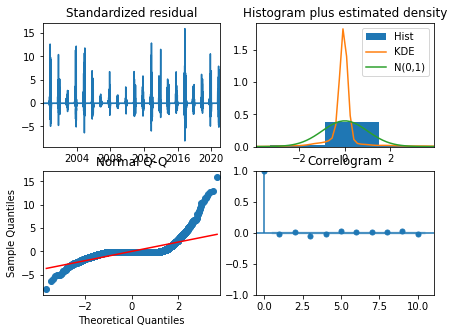

In [192]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean near zero.

Bottom left: Some dots don't fall in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

In [194]:
# Build Model
model = ARIMA(train_data, order=(3, 0, 1))  
fitted = model.fit()  
print(fitted.summary)

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x29d2f5490>>


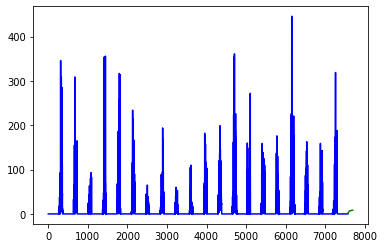

In [205]:
from pmdarima.model_selection import train_test_split

# Load/split your data
train, test = train_test_split(df1, train_size=7575)
# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)
# make your forecasts
forecasts = model.predict(len(test))  # predict N steps into the future


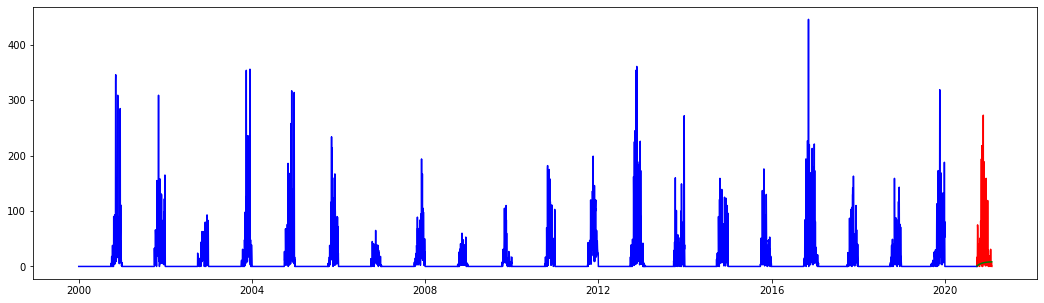

In [229]:
# Visualize the forecasts (blue=train, green=forecasts)
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(18)

# fig = model.plot(forecasts, ax=ax)
# x = np.arange(len(df1))
x=df1.index
plt.plot( x[-126:],test['y'], color='r')
plt.plot(x[:-126], train, c='blue')
plt.plot(x[-126:], forecasts, c='green')
plt.show()

# Prophet model

In [152]:
from fbprophet import Prophet

df1=pd.DataFrame()
df1['ds']=df['Count Date']
df1['y']=df['Count']
df1.head()

,ds,y
0,2017-09-26,0.0
1,2017-09-27,0.0
2,2017-09-28,3.0
3,2017-09-29,0.0
4,2017-09-30,0.0


In [153]:
# split data
train_data=df1[0:310]
test_data=df1[311:]
# fit model
m = Prophet()
m.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.91056
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       520.778   1.49117e-08       73.8555      0.4369      0.4369      103   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [154]:
# forecast the following 365 days
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


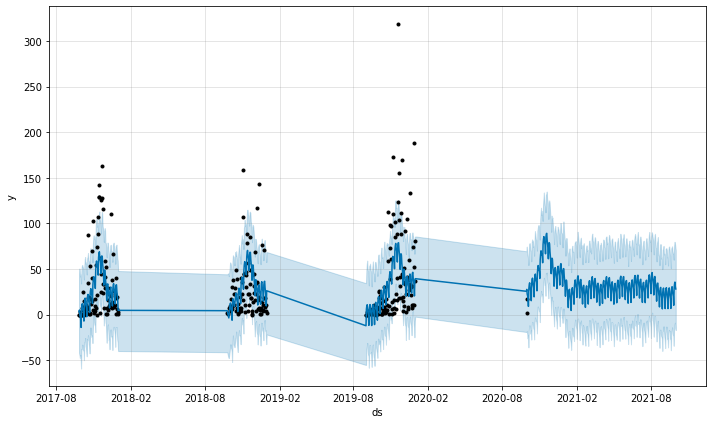

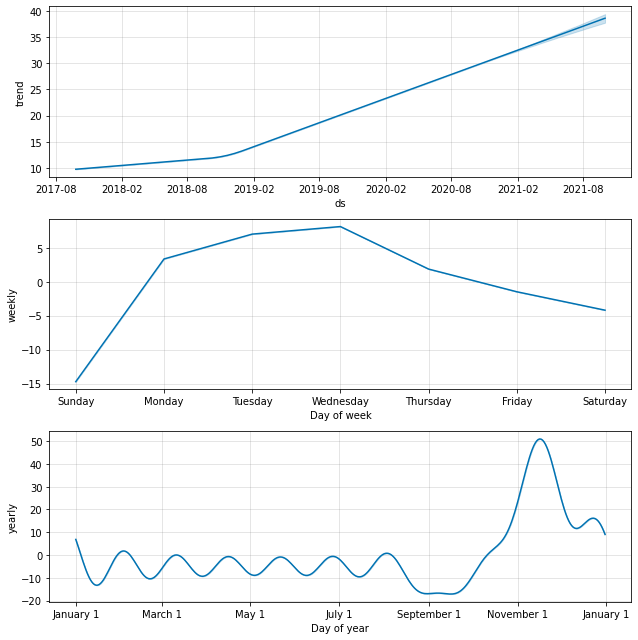

In [155]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [156]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='300 days', period='80 days', horizon = '200 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2019-04-30 00:00:00 and 2020-03-15 00:00:00
  0%|          | 0/5 [00:00<?, ?it/s]/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.92491
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       222.436    2.6595e-07       91.3855      0.5156      0.5156      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       222.436     5.982e-09       95.6543      0.3475      0.3475      144   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


 20%|██        | 1/5 [00:00<00:02,  1.95it/s]/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.92491
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       222.436    2.6595e-07       91.3855      0.5156      0.5156      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       222.436     5.982e-09       95.6543      0.3475      0.3475      144   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


 40%|████      | 2/5 [00:10<00:17,  5.86s/it]/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.50317
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       280.555   1.54573e-06       97.6026           1           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     114       280.604    0.00063059       100.179   5.684e-06       0.001      199  LS failed, Hessian reset 
     192       280.645   6.61465e-09       91.1806      0.3919           1      304   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


 60%|██████    | 3/5 [00:10<00:06,  3.44s/it]/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -5.29624
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       518.732   5.74391e-05       87.0682           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     160       518.747   3.38075e-08       78.8067           1           1      213   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


 80%|████████  | 4/5 [00:11<00:02,  2.26s/it]/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -4.90379
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      93       517.096   5.78554e-09       77.0077     0.06107           1      129   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


100%|██████████| 5/5 [00:11<00:00,  2.33s/it]


In [157]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,25 days,2167.082374,46.551932,30.467985,1.174400,0.714286
1,26 days,2194.676976,46.847380,31.102259,0.884694,0.714286
2,27 days,2214.642132,47.059984,31.605025,0.884694,0.714286
3,28 days,1718.767043,41.458015,29.236320,1.282265,0.732143
4,29 days,1242.364808,35.247196,27.151282,1.282265,0.714286


# VAR model

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [150]:
df=df.dropna()
target = df['grass_count']
print('X.shape:', df.shape)
 
 
# select feature by person coefficient
X = np.array(df)
Y = np.array(target)
skb = SelectKBest(score_func=f_regression, k=7)
skb.fit(X, Y.ravel())
print('selected features:', [df.columns[i] for i in skb.get_support(indices = True)])
X_selected = skb.transform(X)
print('X_selected.shape:', X_selected.shape)



X.shape: (7695, 172)
selected features: ['av_swsfcdown', 'av_swsfcdown_numhours_1D', 'av_swsfcdown_numhours_10D', 'av_swsfcdown_sum_10D', 'forcing_temp_numhours_180D', 'forcing_temp_sum_180D', 'grass_count']
X_selected.shape: (7695, 7)


In [168]:
X_selected=pd.DataFrame(X_selected,columns=[df.columns[i] for i in skb.get_support(indices = True)])
X_selected

,av_swsfcdown,av_swsfcdown_numhours_1D,av_swsfcdown_numhours_10D,av_swsfcdown_sum_10D,forcing_temp_numhours_180D,forcing_temp_sum_180D,grass_count
0,411.645000,16.0,21.0,14612.296875,0.0,0.000000,0.0
1,333.087500,16.0,36.0,22118.546875,1.0,0.553125,0.0
2,274.170000,16.0,51.0,28420.921875,1.0,0.553125,0.0
3,309.916250,16.0,66.0,35528.796875,1.0,0.553125,0.0
4,344.033125,16.0,81.0,43629.343750,1.0,0.553125,0.0
...,...,...,...,...,...,...,...
7690,130.549167,15.0,152.0,71764.820016,113.0,341.590070,1.0
7691,334.555417,15.0,152.0,72318.180003,113.0,341.590070,7.0
7692,132.476798,16.0,152.0,67785.839900,113.0,341.590070,2.0
7693,86.142084,15.0,152.0,63012.549925,113.0,341.590070,0.0


## Grangers Causality test

In [255]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index=[var for var in variables]
    # df.drop([i for i in variables if i!='grass_count'])
    # df=df.drop([1,2,3,4,5,6])
    return df

gm=grangers_causation_matrix(X_selected, variables = X_selected.columns)

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/opt

In [258]:
gm=gm.drop([i for i in X_selected.columns if i!='grass_count'])


KeyError: "['av_swsfcdown', 'av_swsfcdown_numhours_1D', 'av_swsfcdown_numhours_10D', 'av_swsfcdown_sum_10D', 'forcing_temp_numhours_180D', 'forcing_temp_sum_180D'] not found in axis"

In [264]:
pd.set_option('display.max_colwidth',50)
print(gm)

             av_swsfcdown_x  av_swsfcdown_numhours_1D_x  \
grass_count             0.0                         0.0   

             av_swsfcdown_numhours_10D_x  av_swsfcdown_sum_10D_x  \
grass_count                          0.0                     0.0   

             forcing_temp_numhours_180D_x  forcing_temp_sum_180D_x  \
grass_count                           0.0                      0.0   

             grass_count_x  
grass_count            1.0  


If a given p-value is < 0.05, then, the corresponding X series (column) causes the Y (row).
Almost all the variables in the system are interchangeably causing each other except 9 values > 0.05

## Cointegration test

the presence of a statistically significant connection between two or more time series

In [116]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(X_selected)


Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
av_swsfcdown ::  4708.36   > 111.7797  =>   True
av_swsfcdown_numhours_1D ::  2074.2    > 83.9383   =>   True
av_swsfcdown_numhours_10D ::  1280.23   > 60.0627   =>   True
av_swsfcdown_sum_10D ::  648.77    > 40.1749   =>   True
forcing_temp_numhours_180D ::  300.54    > 24.2761   =>   True
forcing_temp_sum_180D ::  25.78     > 12.3212   =>   True
grass_count ::  0.56      > 4.1296    =>   False


In [153]:
nobs = 200
df_train, df_test = X_selected[0:-nobs], X_selected[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(7495, 7)
(200, 7)


### ADF test for stationarity

In [118]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [119]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "av_swsfcdown" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.9437
 No. Lags Chosen       = 36
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "av_swsfcdown_numhours_1D" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.8523
 No. Lags Chosen       = 33
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "av_swsfcdown_numhours_10D" 
    -----------------------------------------------
 Null Hypothesis: Data has unit r

### Select the order of VAR model

In [154]:
model = VAR(X_selected)
forecasting_model = VAR(df_train)
results_aic = []
for p in range(1,3):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

In [155]:
x = model.select_order(maxlags=20)
x.summary()

,AIC,BIC,FPE,HQIC
0,54.62,54.63,5.276e+23,54.62
1,32.49,32.54,1.293e+14,32.51
2,32.02,32.12,8.063e+13,32.05
3,31.92,32.06,7.297e+13,31.97
4,31.85,32.03,6.780e+13,31.91
5,31.78,32.01,6.357e+13,31.86
6,31.72,31.99,5.958e+13,31.81
7,31.61,31.92,5.330e+13,31.72
8,31.41,31.77,4.391e+13,31.54
9,31.13,31.53,3.298e+13,31.27


In [156]:
model_fitted = model.fit(19)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 10, Oct, 2022
Time:                     14:50:46
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    30.9524
Nobs:                     7676.00    HQIC:                   30.3947
Log likelihood:          -190842.    FPE:                1.18533e+13
AIC:                      30.1036    Det(Omega_mle):     1.05009e+13
--------------------------------------------------------------------
Results for equation av_swsfcdown
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                               -114.972058        17.439144           -6.593           0.000
L1.av_swsfcdown                        0.420417         0.029302           14.348  

### Check for Serial Correlation of Residuals

In [ ]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)
def adjust(val, length= 6): return str(val).ljust(length)
for col, val in zip(X_selected.columns, out):
    print(adjust(col), ':', round(val, 2))

Count  : 2.11
av_swsfcdown : 2.11
av_temp_scrn : 2.08
av_temp_scrn_max : 2.03
av_temp_scrn_max_1h_rise : 2.02
av_temp_scrn_max_afternoon : 2.03
av_temp_scrn_min_afternoon : 2.05
av_temp_scrn_max_day_3hrise : 2.04
av_temp_scrn_max_day_3hfall : 1.98
thermal_time_1D : 2.02


there is no significant serial correlation.

## Forecast

In [160]:
nobs = 120
df_train, df_test =  X_selected[0:-nobs],X_selected[-nobs:]
print(df_train.shape)
print(df_test.shape)

(7575, 7)
(120, 7)


In [171]:
# Get the lag order (we already know this)
lag_order = model_fitted.k_ar
print(lag_order) 

# Input data for forecasting
forecast_input = df_train.values[-lag_order:]
forecast_input

# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs) # nobs defined at top of program
df_forecast = pd.DataFrame(fc, index=X_selected.index[-nobs:], columns=X_selected.columns )
df_forecast

19


,av_swsfcdown,av_swsfcdown_numhours_1D,av_swsfcdown_numhours_10D,av_swsfcdown_sum_10D,forcing_temp_numhours_180D,forcing_temp_sum_180D,grass_count
7575,226.956079,13.767396,53.548465,19656.306734,0.889143,4.515080,64.269938
7576,93.226662,14.378339,50.899647,18151.454863,2.091688,11.235209,45.879837
7577,131.024275,14.766558,58.402320,20684.124371,3.099481,17.223798,-12.511248
7578,97.315053,14.722950,68.601553,21900.496678,3.670539,20.518390,-8.121121
7579,241.539024,13.820285,79.141845,26955.751451,4.603791,27.173799,1.153640
...,...,...,...,...,...,...,...
7690,282.642221,15.614363,150.383046,68026.795613,135.667491,539.899884,16.577869
7691,282.175396,15.601817,150.334638,67977.748398,137.469952,546.575929,16.417327
7692,281.683477,15.588924,150.281474,67921.935709,139.268810,553.246290,16.254382
7693,281.168129,15.575693,150.223643,67859.344820,141.063577,559.909082,16.089183


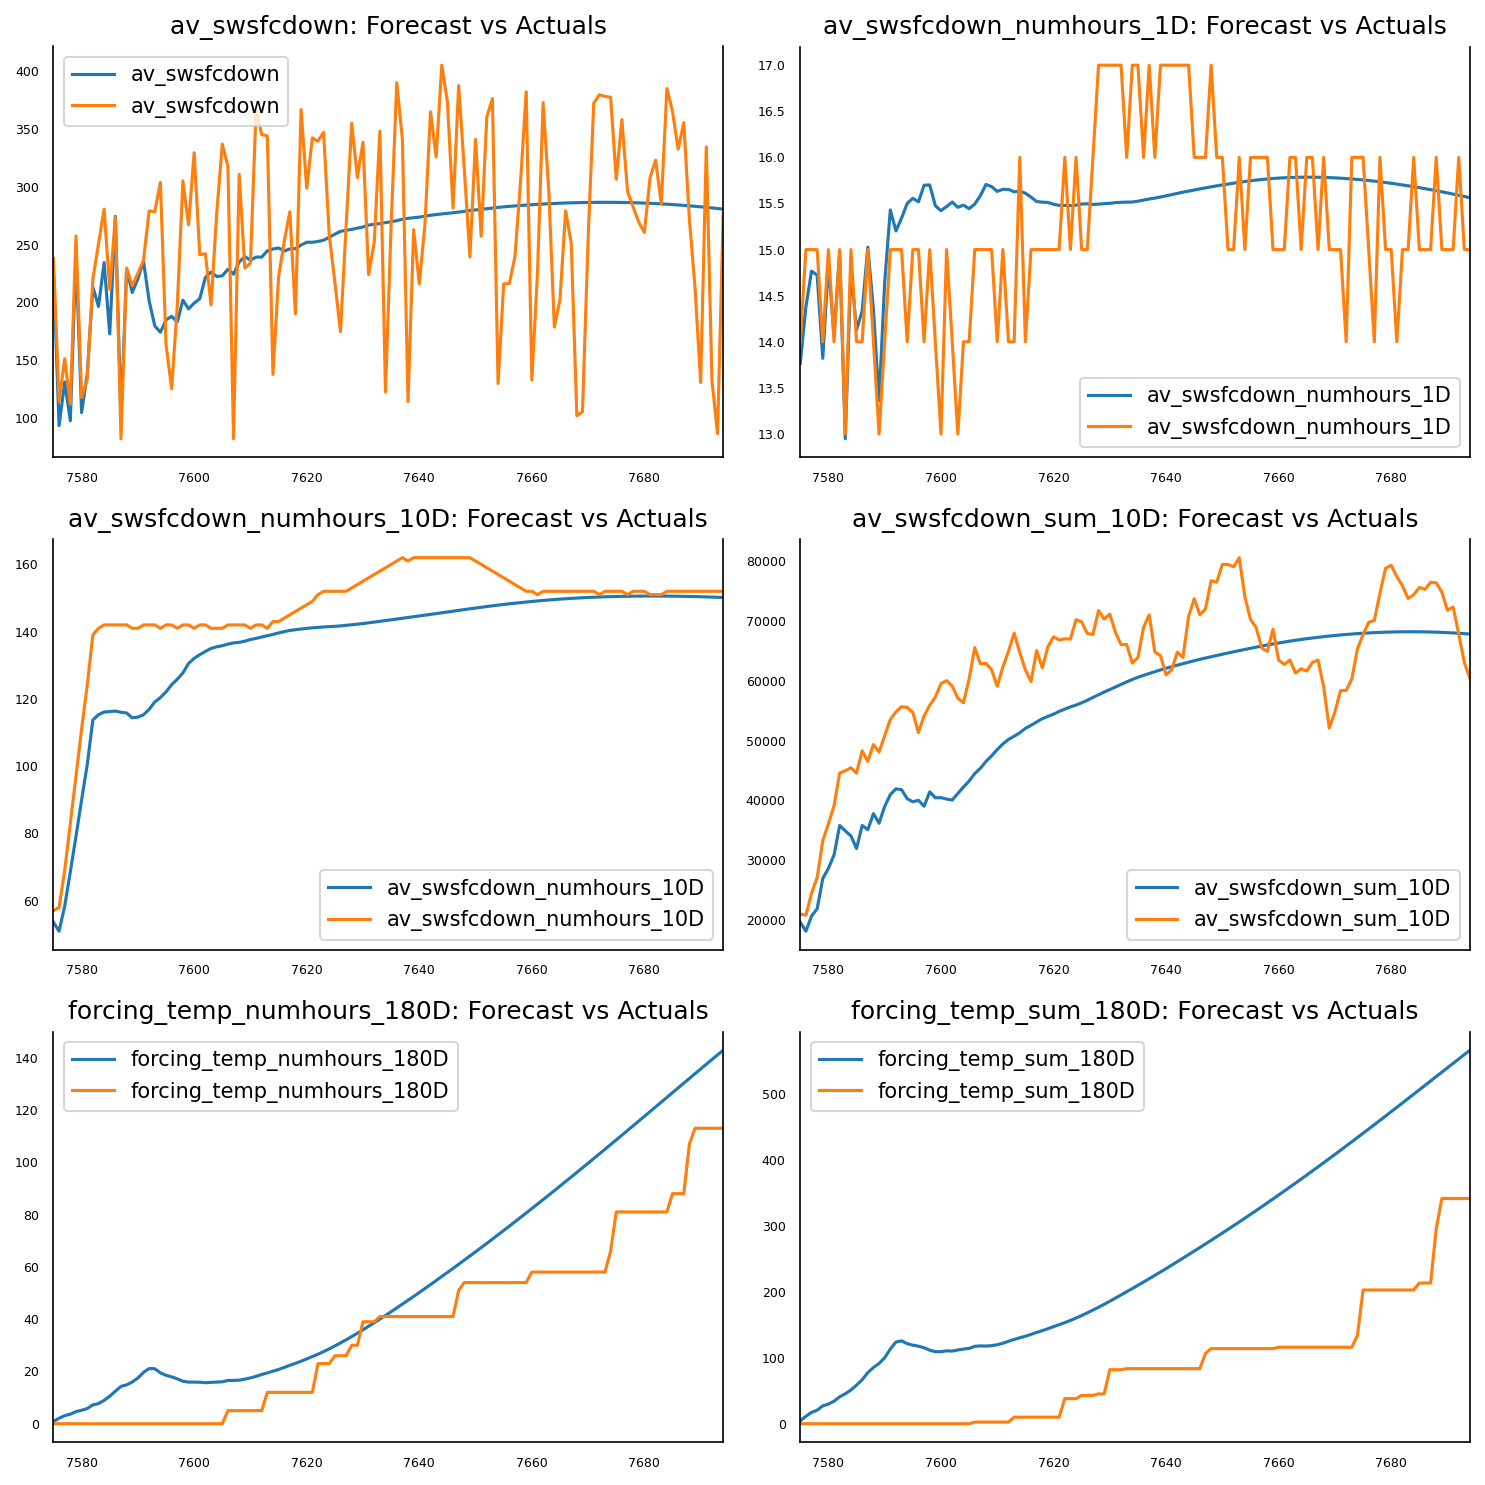

In [162]:
ig, axes = plt.subplots(nrows=int(len(X_selected.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(X_selected.columns, axes.flatten())):
    df_forecast[col].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [176]:
test_original = X_selected[-nobs:]
# test_original.index = pd.to_datetime(test_original.index)
test_original

,av_swsfcdown,av_swsfcdown_numhours_1D,av_swsfcdown_numhours_10D,av_swsfcdown_sum_10D,forcing_temp_numhours_180D,forcing_temp_sum_180D,grass_count
7575,237.758330,14.0,57.0,21019.652594,0.0,0.00000,69.0
7576,114.223600,15.0,58.0,20827.112662,0.0,0.00000,47.0
7577,151.055200,15.0,69.0,24477.129897,0.0,0.00000,1.0
7578,111.615201,15.0,83.0,27114.429910,0.0,0.00000,1.0
7579,257.357501,14.0,97.0,33291.009923,0.0,0.00000,2.0
...,...,...,...,...,...,...,...
7690,130.549167,15.0,152.0,71764.820016,113.0,341.59007,1.0
7691,334.555417,15.0,152.0,72318.180003,113.0,341.59007,7.0
7692,132.476798,16.0,152.0,67785.839900,113.0,341.59007,2.0
7693,86.142084,15.0,152.0,63012.549925,113.0,341.59007,0.0


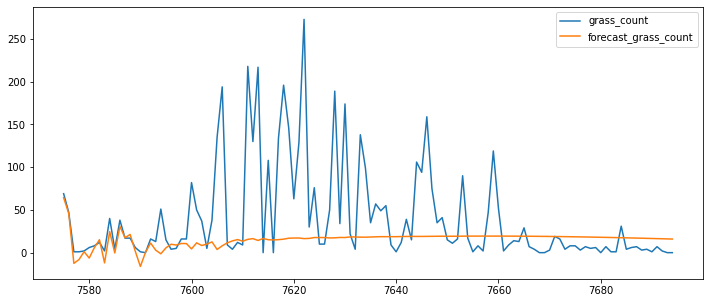

In [196]:
test_original['grass_count'].plot(figsize=(12,5),legend=True)
df_forecast['grass_count'].plot()
plt.legend(labels=['grass_count','forecast_grass_count'])

In [238]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
y_true = test_original['grass_count']
y_pred = df_forecast['grass_count']
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE Error in forecasts = {}'.format(round(rmse, 2)))

RMSE Error in forecasts = 61.8


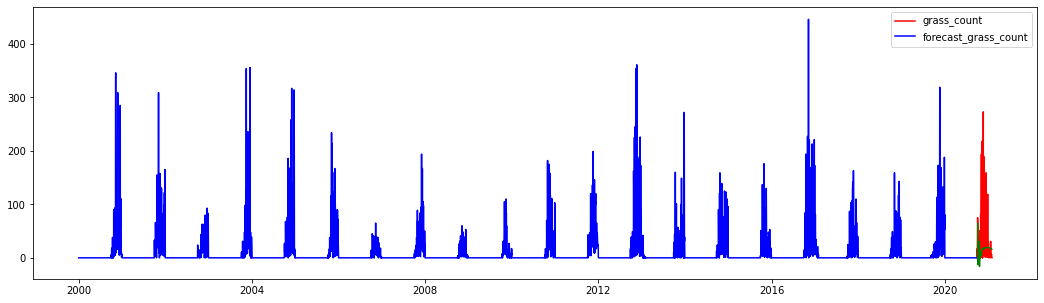

In [233]:
# Visualize the forecasts (blue=train, green=forecasts)
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(18)

# fig = model.plot(forecasts, ax=ax)
# x = np.arange(len(df1))
x=df1.index
plt.plot( x[-126:],test['y'], color='r')
plt.plot(x[:-126], train, c='blue')
plt.plot(x[-120:], df_forecast['grass_count'], c='green')
# test_original['grass_count'].plot(figsize=(12,5),legend=True)
# df_forecast['grass_count'].plot()
plt.legend(labels=['grass_count','forecast_grass_count'])
plt.show()